# Text Data Preprocessing 

#### La partie « linguistique », qui consiste à prétraiter et transformer les informations en entrée en un jeu de données exploitable.

In [22]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
import gensim
import spacy
from spacy import displacy
import fr_core_news_md
nlp = spacy.load("fr_core_news_md")

In [23]:
data = pd.read_csv('ficheMetierBanque&Assurances.txt',delimiter = "\t",header=None)
data.head(3)

,0
0,Info générale sur le secteur
1,Le secteur de la banque et de l’assurance est ...
2,"Banque, Assurance : qualités requises"


In [24]:
corpus=data[0]
corpus = corpus.apply(lambda line: gensim.utils.simple_preprocess(line))

In [118]:
new_corpus=[]
for i in range(len(corpus)):
    if (len(corpus[i])>20) :
        new_corpus.append(corpus[i])
new_corpus=pd.Series(new_corpus)
new_corpus.shape

(269,)

In [119]:
new_corpus

0      [le, secteur, de, la, banque, et, de, assuranc...
1      [un, étudiant, souhaitant, travailler, dans, l...
2      [actuaire, travaille, au, sein, des, compagnie...
3      [profession, méconnue, actuaire, est, affecté,...
4      [il, utilise, des, logiciels, de, probabilités...
                             ...                        
264    [le, milieu, de, la, haute, finance, est, très...
265    [la, profession, de, broker, est, très, éprouv...
266    [la, formation, pour, devenir, trader, est, re...
267    [les, candidats, au, poste, de, broker, doiven...
268    [les, traders, ne, sont, pas, très, nombreux, ...
Length: 269, dtype: object

In [154]:
list_corpus = []
for i in new_corpus :
    chaine=""
    for j in i :
        chaine = chaine +" " + j
    list_corpus.append(chaine)
#list_corpus=pd.Series(list_corpus)
#list_corpus.shape
print(list_corpus)

[' le secteur de la banque et de assurance est un marché qui recrute en permanence de plus au cours de la prochaine décennie ce secteur fera face aux très nombreux départs la retraite des baby boomers les entreprises du secteur bancaire et de assurance prévoient donc le recrutement massif de jeunes diplômés en france il existe banques qui se partagent agences le marché des assurances est aussi riche avec assureurs le secteur bancaire compte plus de salariés celui de assurance près de depuis plusieurs années maintenant les banques proposent des assurances et les assurances proposent des services et produits bancaires la richesse des services proposés par un même établissement impose avoir des connaissances dans divers domaines banques et assurances ont également dû se moderniser afin de répondre aux exigences de la nouvelle génération chaque structure possède en plus de ses agences un site internet complet avec des espaces clients et des services en ligne et des applications pour smartp

In [ ]:
list_corpus_nlp = []
list_pos = []
for i in list_corpus:
    token = nlp(i)
    for j in token : 
        #print(j.pos_)
        pos = j.pos_
        list_pos.append(pos)
    list_corpus_nlp.append(list_pos)
    print(list_corpus_nlp)
            
    
    
        
#print(list_corpus_nlp)

[['SPACE', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'CCONJ', 'ADP', 'NOUN', 'AUX', 'DET', 'NOUN', 'PRON', 'VERB', 'ADP', 'NOUN', 'ADP', 'ADV', 'ADP', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'DET', 'NOUN', 'VERB', 'NOUN', 'DET', 'ADV', 'ADJ', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'CCONJ', 'ADP', 'NOUN', 'VERB', 'ADV', 'DET', 'NOUN', 'ADJ', 'ADP', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'PRON', 'VERB', 'ADJ', 'PRON', 'PRON', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'AUX', 'ADV', 'ADJ', 'ADP', 'NOUN', 'DET', 'NOUN', 'ADJ', 'VERB', 'ADV', 'ADP', 'NOUN', 'PRON', 'ADP', 'NOUN', 'ADV', 'ADP', 'ADP', 'DET', 'NOUN', 'ADV', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ', 'NOUN', 'ADJ', 'DET', 'NOUN', 'ADP', 'NOUN', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'CCONJ', 'NOUN', 'AUX', 'ADV', 'VERB', 'PRON', 'VERB', 'ADV', 'ADP', 'VERB', 'ADP', 'NOUN', 'ADP', 'DET', 'AD

[['SPACE', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'CCONJ', 'ADP', 'NOUN', 'AUX', 'DET', 'NOUN', 'PRON', 'VERB', 'ADP', 'NOUN', 'ADP', 'ADV', 'ADP', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'DET', 'NOUN', 'VERB', 'NOUN', 'DET', 'ADV', 'ADJ', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'CCONJ', 'ADP', 'NOUN', 'VERB', 'ADV', 'DET', 'NOUN', 'ADJ', 'ADP', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'PRON', 'VERB', 'ADJ', 'PRON', 'PRON', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'AUX', 'ADV', 'ADJ', 'ADP', 'NOUN', 'DET', 'NOUN', 'ADJ', 'VERB', 'ADV', 'ADP', 'NOUN', 'PRON', 'ADP', 'NOUN', 'ADV', 'ADP', 'ADP', 'DET', 'NOUN', 'ADV', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ', 'NOUN', 'ADJ', 'DET', 'NOUN', 'ADP', 'NOUN', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'CCONJ', 'NOUN', 'AUX', 'ADV', 'VERB', 'PRON', 'VERB', 'ADV', 'ADP', 'VERB', 'ADP', 'NOUN', 'ADP', 'DET', 'AD

[['SPACE', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'CCONJ', 'ADP', 'NOUN', 'AUX', 'DET', 'NOUN', 'PRON', 'VERB', 'ADP', 'NOUN', 'ADP', 'ADV', 'ADP', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'DET', 'NOUN', 'VERB', 'NOUN', 'DET', 'ADV', 'ADJ', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'CCONJ', 'ADP', 'NOUN', 'VERB', 'ADV', 'DET', 'NOUN', 'ADJ', 'ADP', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'PRON', 'VERB', 'ADJ', 'PRON', 'PRON', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'AUX', 'ADV', 'ADJ', 'ADP', 'NOUN', 'DET', 'NOUN', 'ADJ', 'VERB', 'ADV', 'ADP', 'NOUN', 'PRON', 'ADP', 'NOUN', 'ADV', 'ADP', 'ADP', 'DET', 'NOUN', 'ADV', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ', 'NOUN', 'ADJ', 'DET', 'NOUN', 'ADP', 'NOUN', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'CCONJ', 'NOUN', 'AUX', 'ADV', 'VERB', 'PRON', 'VERB', 'ADV', 'ADP', 'VERB', 'ADP', 'NOUN', 'ADP', 'DET', 'AD

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [148]:
corpus_nlp = nlp(list_corpus)
list_NER = []
#print(corpus_nlp.text)
for token in corpus_nlp:
    list_NER.append(token.pos_)
    #print(token.text, token.pos_, token.dep_)
print(list_NER)

TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [30]:
new_corpus_Minuscule = []
for i in new_corpus :
    tokensMinuscule = [text.lower() for text in i]
    new_corpus_Minuscule.append(tokensMinuscule)
new_corpus_Minuscule=pd.Series(new_corpus_Minuscule)
new_corpus_Minuscule.shape

(269,)

In [31]:
new_corpus_NP = []
for i in new_corpus_Minuscule :
    tokens = [re.sub(r'[^\w\s]', '', text) for text in i]
    new_corpus_NP.append(tokens)
new_corpus_NP=pd.Series(new_corpus_NP)
new_corpus_NP.shape

(269,)

In [32]:
french_stopwords = nltk.corpus.stopwords.words('french')
newStopWords = ['quelque','quelques','trop','beaucoup','plus','dont','a','moins','faut','comme','leurs','peu','celle','celui','ci','cela','cette','ce','afin','comment','très','entre','aussi','si','tous','tout','toutes','toute','donc','alors','puisque','ici','vers']
french_stopwords.extend(newStopWords)

def remove_stopwords(words,french_stopwords):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in french_stopwords:
            new_words.append(word)
    return new_words


new_corpus_ST = []
for i in new_corpus_NP :
    tokens = [unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').
              decode('utf-8', 'ignore') for text in i if text not in french_stopwords and ~text.isdigit()]
    new_corpus_ST.append(tokens)
new_corpus_ST=pd.Series(new_corpus_ST)
new_corpus_ST.shape

(269,)

In [33]:
ps = PorterStemmer()
new_corpus_stem = []
for i in new_corpus_ST :
    tokens = [ps.stem(text) for text in i]
    new_corpus_stem.append(tokens)
new_corpus_stem=pd.Series(new_corpus_stem)
new_corpus_stem.shape

(269,)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [53]:
def tsnescatterplot(model, word, list_names, model_size):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    
    if (model_size>300):
        model_size=300
    
    arrays = np.empty((0, model_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from model_size to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [54]:
import multiprocessing
cores = multiprocessing.cpu_count() # Compte le nombre de coeurs dans l'ordinateur

In [55]:
model_size = 100
model = gensim.models.Word2Vec(new_corpus_stem, vector_size=100, window=5, min_count=5, workers=cores-1, sg=0)

In [56]:
new_corpus_stem

0      [secteur, banqu, assur, march, recrut, perman,...
1      [etudi, souhait, travail, secteur, banqu, assu...
2      [actuair, travail, sein, compagni, assur, miss...
3      [profess, meconnu, actuair, affect, sieg, comp...
4      [utilis, logiciel, probabilit, statistiqu, per...
                             ...                        
264    [milieu, haut, financ, ferm, diplom, comport, ...
265    [profess, broker, eprouvant, nombr, choisiss, ...
266    [format, devenir, trader, relativ, longu, cand...
267    [candidat, post, broker, doivent, imperativ, p...
268    [trader, nombreux, agit, la, metier, apparu, r...
Length: 269, dtype: object

In [57]:
import time
t0 = time.time()
for i in range(100):
    model.train(corpus, total_examples=len(corpus), epochs=1)
    #print('Train #',i)
print("Elapsed time (seconds) to train Word2Vec: ", time.time() - t0)
#model.save("../models/word2vec.model")

Elapsed time (seconds) to train Word2Vec:  1.161332130432129


In [58]:
model.wv.most_similar(positive="trader",topn=10)

[('salesman', 0.8315842747688293),
 ('assureur', 0.8059371709823608),
 ('peuvent', 0.7183694243431091),
 ('non', 0.6942422389984131),
 ('statut', 0.6915161609649658),
 ('excellent', 0.6828355193138123),
 ('souvent', 0.6817965507507324),
 ('lien', 0.6792526841163635),
 ('obtenir', 0.678778886795044),
 ('direct', 0.6780083775520325)]

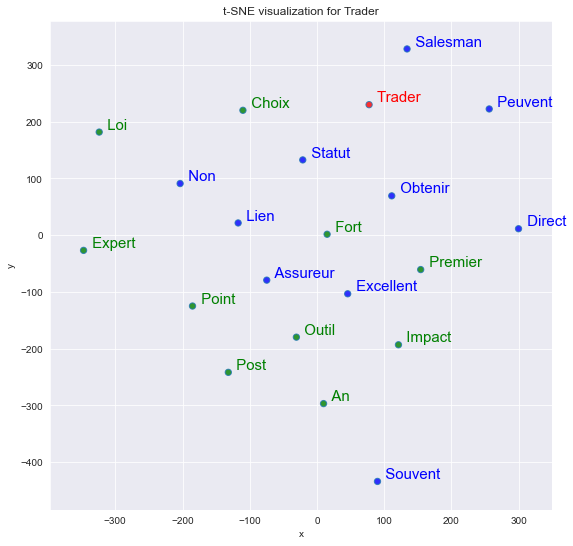

In [59]:
word_tested = 'trader'
tsnescatterplot(model, word_tested, [t[0] for t in model.wv.most_similar(positive=word_tested, topn=20)][10:], model_size)

In [98]:
#test name entity recognation
import spacy
from spacy.lang.fr.examples import sentences 

nlp = spacy.load("fr_core_news_md")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars
Apple PROPN nsubj
cherche VERB ROOT
à ADP mark
acheter VERB xcomp
une DET det
start NOUN obj
- NOUN ROOT
up PROPN dep
anglaise ADJ amod
pour ADP case
1 NUM nummod
milliard NOUN ROOT
de ADP case
dollars NOUN nmod
